## **1. Tải dữ liệu và các thư viện cần thiết**

In [ ]:
!gdown --id 1FMpKFYqyNG0eB-3Ef1Z81s-9ZhuAmmg2

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1FMpKFYqyNG0eB-3Ef1Z81s-9ZhuAmmg2
From (redirected): https://drive.google.com/uc?id=1FMpKFYqyNG0eB-3Ef1Z81s-9ZhuAmmg2&confirm=t&uuid=a34e8b0f-e740-42f9-893a-c9dd2a0ce6bb
To: /content/data.zip
100% 487M/487M [00:13<00:00, 36.4MB/s]


In [ ]:
!unzip data

Archive:  data.zip
   creating: data/
   creating: data/test/
   creating: data/test/Mosquito/
  inflating: data/test/Mosquito/136297507_7d6bad75ca_b.jpg  
   creating: data/test/Cheetah/
  inflating: data/test/Cheetah/10886505233_45305c1b86_b.jpg  
   creating: data/test/Caterpillar/
  inflating: data/test/Caterpillar/2558781597_6a403b6776_b.jpg  
   creating: data/test/savannah/
  inflating: data/test/savannah/15537756043_ca9b919715_b.jpg  
   creating: data/test/Civet/
  inflating: data/test/Civet/2450906296_01c5bd5f4b_b.jpg  
   creating: data/test/bed/
  inflating: data/test/bed/102047251_89a86ba19b_b.jpg  
   creating: data/test/bird/
  inflating: data/test/bird/14127221113_cea5c88a6f_b.jpg  
   creating: data/test/horizon/
  inflating: data/test/horizon/11938225285_327f90e6bf_b.jpg  
   creating: data/test/Coast/
  inflating: data/test/Coast/14649787867_270d208420_b.jpg  
   creating: data/test/fox/
  inflating: data/test/fox/13486614834_eaa4fd95aa_b.jpg  
   creating: data/test

In [ ]:
%pip install chromadb
%pip install open-clip-torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 89.8 MB/s eta 0:00:00
 

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction

## **2. Lấy danh sách các class của ảnh trong data và chuyển đổi**


In [ ]:
ROOT = 'data'  # Đường dẫn gốc tới thư mục chứa dữ liệu
CLASS_NAME = sorted(list(os.listdir(f'{ROOT}/train')))  # Lấy danh sách tên các lớp (class) và sắp xếp
HNSW_SPACE = "hnsw:space"  # Chỉ định không gian HNSW

In [ ]:
def get_files_path(path):
    files_path = []
    for label in CLASS_NAME:
        label_path = path + "/" + label  # Đường dẫn tới thư mục của từng lớp
        filenames = os.listdir(label_path)  # Lấy danh sách các tệp tin trong thư mục lớp
        for filename in filenames:
            filepath = label_path + '/' + filename  # Đường dẫn đầy đủ tới từng ảnh
            files_path.append(filepath)  # Thêm đường dẫn vào danh sách
    return files_path

In [ ]:
data_path = f'{ROOT}/train'  # Đường dẫn tới thư mục dữ liệu
files_path = get_files_path(path=data_path)  # Lấy danh sách các đường dẫn ảnh
files_path

['data/train/Alligator/26989652518_f477651cea_b.jpg',
 'data/train/Alligator/33182094940_48850d8a40_b.jpg',
 'data/train/Alligator/3194815487_db71ef667e_b.jpg',
 'data/train/Alligator/7898091798_afcb7e1fdc_b.jpg',
 'data/train/Alligator/32501140074_dbd60c48db_b.jpg',
 'data/train/Alligator/3195698856_b2b30d3325_b.jpg',
 'data/train/Alligator/3565822680_8771be8e42_b.jpg',
 'data/train/Alligator/3195652916_92140de2bb_b.jpg',
 'data/train/Alligator/27380865196_f09bf12e6c_b.jpg',
 'data/train/Alligator/34308654741_4566920fb7_b.jpg',
 'data/train/Alligator/6508640869_4306a82c52_b.jpg',
 'data/train/Alligator/32447450714_4329c3daf8_b.jpg',
 'data/train/Alligator/3195646814_875427d59f_b.jpg',
 'data/train/Alligator/33408445492_c5ce051fcc_b.jpg',
 'data/train/Alligator/3582400631_9137a4aa27_b.jpg',
 'data/train/Alligator/29033845108_9ff9b5858e_b.jpg',
 'data/train/Alligator/3195700826_7b2edfafd6_b.jpg',
 'data/train/Alligator/34338838754_079a3bd632_b.jpg',
 'data/train/Alligator/29096466125_fe

In [ ]:
def plot_results(image_path, files_path, results):
    query_image = Image.open(image_path).resize((448,448))  # Mở ảnh truy vấn và thay đổi kích thước
    images = [query_image]  # Danh sách chứa ảnh truy vấn
    class_name = []  # Danh sách chứa tên lớp của các ảnh
    for id_img in results['ids'][0]:
        id_img = int(id_img.split('_')[-1])  # Lấy ID ảnh từ kết quả
        img_path = files_path[id_img]  # Lấy đường dẫn ảnh từ danh sách
        img = Image.open(img_path).resize((448,448))  # Mở ảnh và thay đổi kích thước
        images.append(img)  # Thêm ảnh vào danh sách
        class_name.append(img_path.split('/')[2])  # Thêm tên lớp vào danh sách

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Tạo lưới đồ thị với 2 hàng và 3 cột

    # Lặp qua các ảnh và vẽ chúng lên đồ thị
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])  # Hiển thị ảnh
        if i == 0:
            ax.set_title(f"Query Image: {image_path.split('/')[2]}")  # Tiêu đề cho ảnh truy vấn
        else:
            ax.set_title(f"Top {i+1}: {class_name[i-1]}")  # Tiêu đề cho các ảnh tìm thấy
        ax.axis('off')  # Ẩn trục đồ thị
    # Hiển thị đồ thị
    plt.show()

In [ ]:
embedding_function = OpenCLIPEmbeddingFunction()  # Khởi tạo hàm nhúng OpenCLIP

def get_single_image_embedding(image):
    embedding = embedding_function._encode_image(image=np.array(image))  # Lấy nhúng của ảnh
    return embedding

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [ ]:
img = Image.open('data/train/Cottonplant/51406887178_c3ee3596ac_b.jpg')  # Mở ảnh mẫu
get_single_image_embedding(image=img)  # Lấy nhúng của ảnh mẫu

[-0.021943315863609314,
 0.18551382422447205,
 -0.08898402005434036,
 0.002249553333967924,
 -0.03609743341803551,
 0.02564077079296112,
 0.07153219729661942,
 -0.022506648674607277,
 -0.027199307456612587,
 -0.023485152050852776,
 -0.02501581609249115,
 -0.03853178024291992,
 0.0337408110499382,
 -0.05378113314509392,
 -0.041378989815711975,
 0.03341974318027496,
 -0.06577347964048386,
 0.016179420053958893,
 0.017339538782835007,
 0.08248525112867355,
 0.0037490755785256624,
 0.02656797133386135,
 0.025672683492302895,
 -0.022092921659350395,
 -0.037981197237968445,
 -0.13580869138240814,
 -0.000549822230823338,
 0.027148311957716942,
 -0.014947495423257351,
 -0.0179095808416605,
 0.014572779648005962,
 0.059105902910232544,
 0.03255927562713623,
 0.050297919660806656,
 0.011551064439117908,
 0.039967697113752365,
 -0.00490852165967226,
 0.0017362131038680673,
 -0.01369548961520195,
 -0.02665412425994873,
 -0.017370127141475677,
 -0.0363987497985363,
 -0.0020816554315388203,
 0.02706

## **3.1 Truy vấn ảnh với L2 Collection**

In [ ]:
def add_embedding(collection, files_path):
    ids = []  # Danh sách chứa ID của các ảnh
    embeddings = []  # Danh sách chứa nhúng của các ảnh
    for id_filepath, filepath in tqdm(enumerate(files_path)):  # Lặp qua các ảnh và đường dẫn của chúng
        ids.append(f'id_{id_filepath}')  # Tạo ID cho mỗi ảnh
        image = Image.open(filepath)  # Mở ảnh
        embedding = get_single_image_embedding(image=image)  # Lấy nhúng của ảnh
        embeddings.append(embedding)  # Thêm nhúng vào danh sách
    collection.add(
        embeddings=embeddings,  # Thêm nhúng vào collection
        ids=ids  # Thêm ID vào collection
    )

In [ ]:
import chromadb
from tqdm import tqdm

In [ ]:
# Tạo một Chroma Client
chroma_client = chromadb.Client()
# Tạo một collection mới hoặc lấy collection nếu đã tồn tại
l2_collection = chroma_client.get_or_create_collection(name="l2_collection",
                                                           metadata={HNSW_SPACE: "l2"})
add_embedding(collection=l2_collection, files_path=files_path)  # Thêm nhúng của các ảnh vào collection

2541it [09:54,  4.27it/s]


In [ ]:
def search(image_path, collection, n_results):
    query_image = Image.open(image_path)  # Mở ảnh truy vấn
    query_embedding = get_single_image_embedding(query_image)  # Lấy nhúng của ảnh truy vấn
    results = collection.query(
        query_embeddings=[query_embedding],  # Thực hiện truy vấn với nhúng của ảnh
        n_results=n_results  # Số lượng kết quả cần trả về
    )
    return results

In [ ]:
test_path = f'{ROOT}/test'  # Đường dẫn tới thư mục test
test_files_path = get_files_path(path=test_path)  # Lấy danh sách các đường dẫn ảnh trong thư mục test
test_path = test_files_path[5]  # Chọn một ảnh từ danh sách
l2_results = search(image_path=test_path, collection=l2_collection, n_results=5)  # Tìm kiếm ảnh

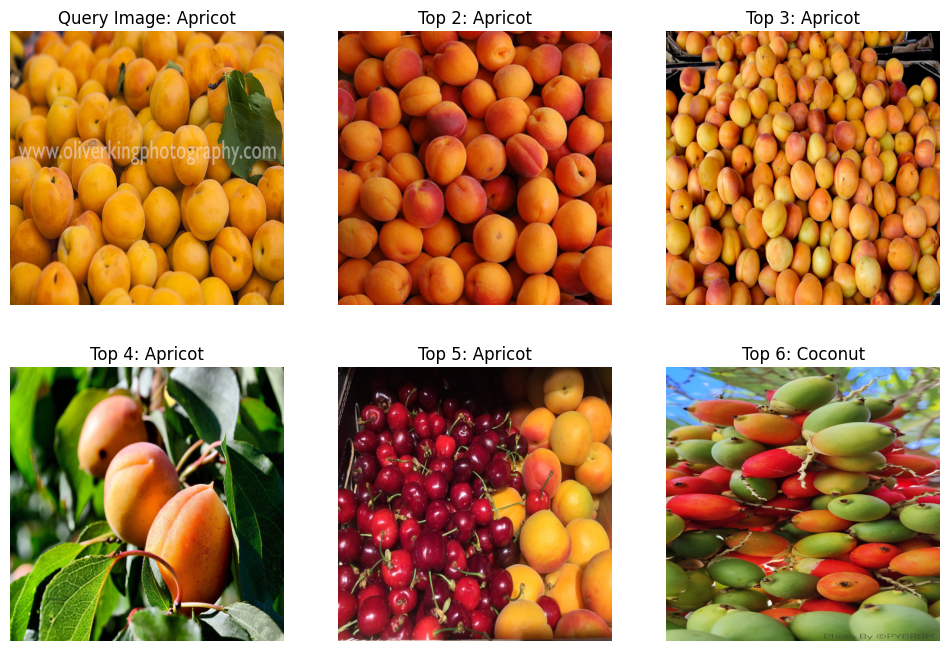

In [ ]:
plot_results(image_path=test_path, files_path=files_path, results=l2_results)  # Hiển thị kết quả tìm kiếm

## **3.2 Truy vấn ảnh với Cosine Similarity Collection**

In [ ]:
# Tạo một collection mới hoặc lấy collection nếu đã tồn tại
cosine_collection = chroma_client.get_or_create_collection(name="Cosine_collection",
                                                           metadata={HNSW_SPACE: "cosine"})

# Thêm nhúng của các ảnh vào collection Cosine
add_embedding(collection=cosine_collection, files_path=files_path)

2541it [10:04,  4.20it/s]


In [ ]:
test_path = f'{ROOT}/test'  # Đường dẫn tới thư mục test
test_files_path = get_files_path(path=test_path)  # Lấy danh sách các đường dẫn ảnh trong thư mục test
test_path = test_files_path[10]  # Chọn một ảnh từ danh sách

# Tìm kiếm ảnh trong collection Cosine
cosine_results = search(image_path=test_path, collection=cosine_collection, n_results=5)

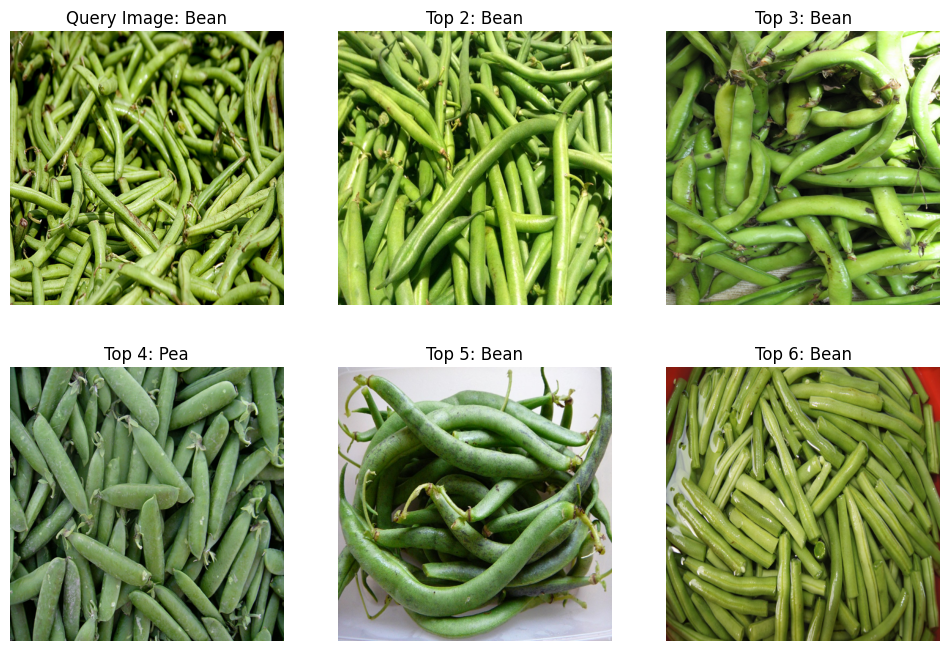

In [ ]:
# Hiển thị kết quả tìm kiếm
plot_results(image_path=test_path, files_path=files_path, results=cosine_results)